# Ensembles
---------------------------------

This example shows how we can use ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, verbose=2, random_state=1)
atom.run(models=['lr', 'tree', 'lgb'], metric='accuracy')

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ================== >>
Shape: (569, 31)
Scaled: False
-----------------------------------
Train set size: 456
Test set size: 113
-----------------------------------
Train set balance: 0:1 <==> 1.0:1.7
Test set balance: 0:1 <==> 1.0:1.5
-----------------------------------
Distribution of classes:
|    |   dataset |   train |   test |
|---:|----------:|--------:|-------:|
|  0 |       212 |     167 |     45 |
|  1 |       357 |     289 |     68 |


Training ===================================== >>
Models: LR, Tree, LGB
Metric: accuracy


Results for Logistic Regression:         
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9912
Test evaluation --> accuracy: 0.9646
Time elapsed: 0.035s
-------------------------------------------------
Total time: 0.035s


Results for Decision Tree:         
Fit ---------------------------------------------
Train evalu

## Voting

In [4]:
# After fitting the models we combine them in a Voting model
atom.voting()

Voting added to the models!


In [5]:
# We now have an extra model in the pipeline
atom.models

['LR', 'Tree', 'LGB', 'Vote']

In [6]:
# We can use the Voting model like other models to make predictions or plots
atom.vote.predict_proba_test[:10]

array([[4.19991299e-01, 5.80008701e-01],
       [6.48864108e-05, 9.99935114e-01],
       [4.27978923e-05, 9.99957202e-01],
       [9.99989219e-01, 1.07807315e-05],
       [3.05053115e-03, 9.96949469e-01],
       [9.98028247e-01, 1.97175259e-03],
       [3.49327649e-03, 9.96506724e-01],
       [2.49145998e-04, 9.99750854e-01],
       [2.43109249e-05, 9.99975689e-01],
       [3.27725335e-04, 9.99672275e-01]])

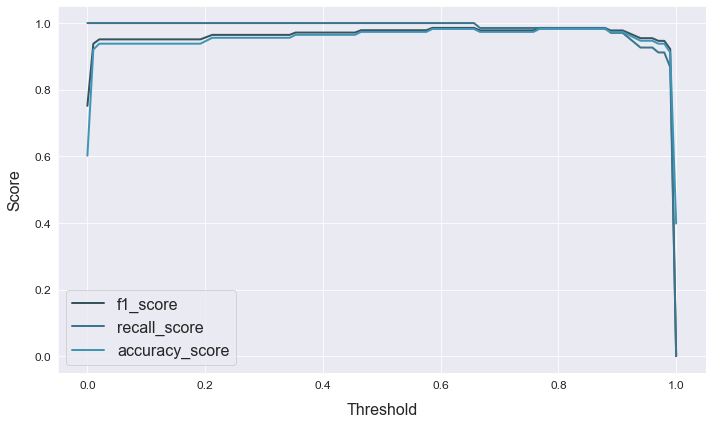

In [7]:
atom.vote.plot_threshold(metric=["f1", "recall", "accuracy"])

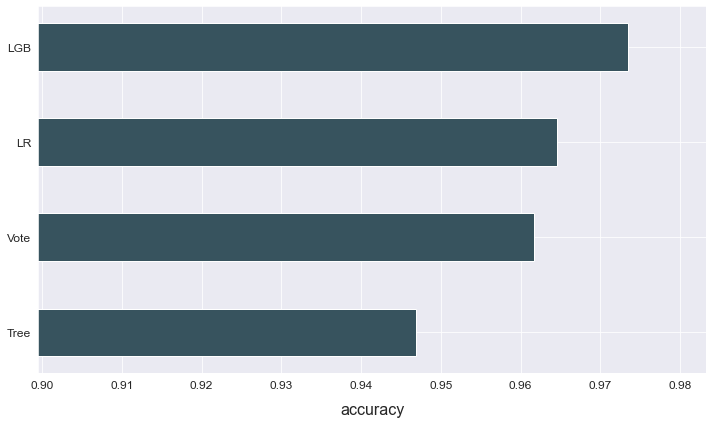

In [8]:
atom.plot_results()

In [9]:
atom.vote.delete()

Model deleted successfully!


## Stacking

In [10]:
# Just like Voting, we can create a Stacking model
atom.stacking(estimator="LDA")

Stacking added to the models!


In [11]:
# The underlying final estimator uses the predictions and the features as dataset
atom.stack.dataset.head()

,predict_proba_LR,predict_proba_Tree,predict_proba_LGB,target
0,0.944629,1.0,0.998580,1
1,0.006326,0.0,0.000161,0
2,0.992223,1.0,0.999963,1
3,0.003557,0.0,0.001161,0
4,0.047350,0.0,0.004474,0


In [12]:
# The model can be used for predictions or plots
atom.stack.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,